# Part 1 of the Machine Learning Project

## Preliminaries


Before satring familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html


## Load libraries

In [1]:
import numpy as np
import pandas as pd

import os

# # Suppress warnings
# import warnings
# warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

In [2]:
# # Change this part with your own dataset files

# src_train = 'https://docs.google.com/uc?export=download&id=1TNRRGlws5vWKEum8v1PQrVq8PGacMT9Y'
# src_test = 'https://docs.google.com/uc?export=download&id=1IEUuu-Czdv2gsE8Q0EUtGvUelh2xUwN8'

# src_previous ='https://docs.google.com/uc?export=download&id=15PuV3DpXii2FokryWCyxTS4HGUj4Kbmn'
# src_bureau = 'https://docs.google.com/uc?export=download&id=18ycqN4m4zmoLvZHWIvYzF9SZiErAPeTi'

# # If you cannot load the directly the csv from Google drive (Google restrictions), download them manually then change the path to load them locally

In [3]:
src_train = '../data/application_train.csv.zip'
src_test = '../data/application_test.csv.zip'

src_previous = '../data/previous_application.csv.zip'
src_bureau = '../data/bureau.csv.zip'

<h1>Loading the datasets (2 pts)</h1>

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


In [4]:
# The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past

# 1 - Loading the different datasets.
app_train = pd.read_csv(src_train, compression="zip")
app_test = pd.read_csv(src_test, compression="zip")
bureau = pd.read_csv(src_bureau, compression="zip")
app_past = pd.read_csv(src_previous, compression="zip")

# 2 - The number of rows and columns for each
print('app_train:', app_train.shape)
print('app_test:', app_test.shape)
print('bureau:', bureau.shape)
print('app_past:', app_past.shape)

app_train: (307511, 122)
app_test: (48744, 121)
bureau: (1716428, 17)
app_past: (1670214, 37)


In [5]:
print("app_train: ", app_train.filter(like='SK_ID_').columns)
print("app_test:  ", app_test.filter(like='SK_ID_').columns)
print("bureau:    ", bureau.filter(like='SK_ID_').columns) 
print("app_past:  ", app_past.filter(like='SK_ID_').columns)

app_train:  Index(['SK_ID_CURR'], dtype='object')
app_test:   Index(['SK_ID_CURR'], dtype='object')
bureau:     Index(['SK_ID_CURR', 'SK_ID_BUREAU'], dtype='object')
app_past:   Index(['SK_ID_PREV', 'SK_ID_CURR'], dtype='object')


In [6]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

We are going to do the feature engineering for app_train and then similarly on app_test and bureau as we need them for fruther analysis.

<h1> Feature Engineering</h1>

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts.

In [7]:
# 3.a
print("The columns with the most missing values in app_test are:")
print(app_test.isnull().sum()[app_test.isnull().sum()==app_test.isnull().sum().values.max()])

# 3.b
print("The columns with the most missing values in bureau are:")
print(bureau.isnull().sum()[bureau.isnull().sum()==bureau.isnull().sum().values.max()])
 
# 3.c
print("The columns with the most missing values in app_past are:")
print(app_past.isnull().sum()[app_past.isnull().sum()==app_past.isnull().sum().values.max()])

The columns with the most missing values in app_test are:
COMMONAREA_AVG     33495
COMMONAREA_MODE    33495
COMMONAREA_MEDI    33495
dtype: int64
The columns with the most missing values in bureau are:
AMT_ANNUITY    1226791
dtype: int64
The columns with the most missing values in app_past are:
RATE_INTEREST_PRIMARY       1664263
RATE_INTEREST_PRIVILEGED    1664263
dtype: int64


In [8]:
# checking missing data app_train
total = app_train.isnull().sum().sort_values(ascending = False)
total
percent = (app_train.isnull().sum()/app_train.isnull().count()*100).sort_values(ascending = False)
percent
missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_application_train_data[missing_application_train_data['Total'] != 0]

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


In [9]:
# checking missing data app_test
total = app_test.isnull().sum().sort_values(ascending = False)
total
percent = (app_test.isnull().sum()/app_test.isnull().count()*100).sort_values(ascending = False)
percent
missing_application_test_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_application_test_data[missing_application_test_data['Total'] != 0]

,Total,Percent
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
...,...,...
OBS_30_CNT_SOCIAL_CIRCLE,29,0.059495
OBS_60_CNT_SOCIAL_CIRCLE,29,0.059495
DEF_60_CNT_SOCIAL_CIRCLE,29,0.059495
AMT_ANNUITY,24,0.049237


In [10]:
# checking missing data bureau
total = bureau.isnull().sum().sort_values(ascending = False)
total
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
percent
missing_application_test_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_application_test_data[missing_application_test_data['Total'] != 0]

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757


In [11]:
# 4: Fix missing data in app_test using categorization and/or simple imputation when appropriate. 
# You should use *only* pandas and numpy here. You should *not* use sklearn (scikit-learn).
# Be careful to the **data leakage** issue!
## Your code here

**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique (double click to edit a text cell)



In [12]:
# app_train.dtypes.value_counts()

In [13]:
# app_test.dtypes.value_counts()

In [14]:
# app_test.select_dtypes(include=['object']).columns

This will give us a list of data types for each column. The columns that are of type object are often categorical.
But sometimes numerical categories are stored as integers or floats, so just relying on object types may not catch all categorical features.

In [15]:
# Get number of unique values per column
unique_counts = app_test.nunique()

# Set a threshold for max unique values to consider it categorical
categorical_columns = unique_counts[unique_counts < 20].index
print(categorical_columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10

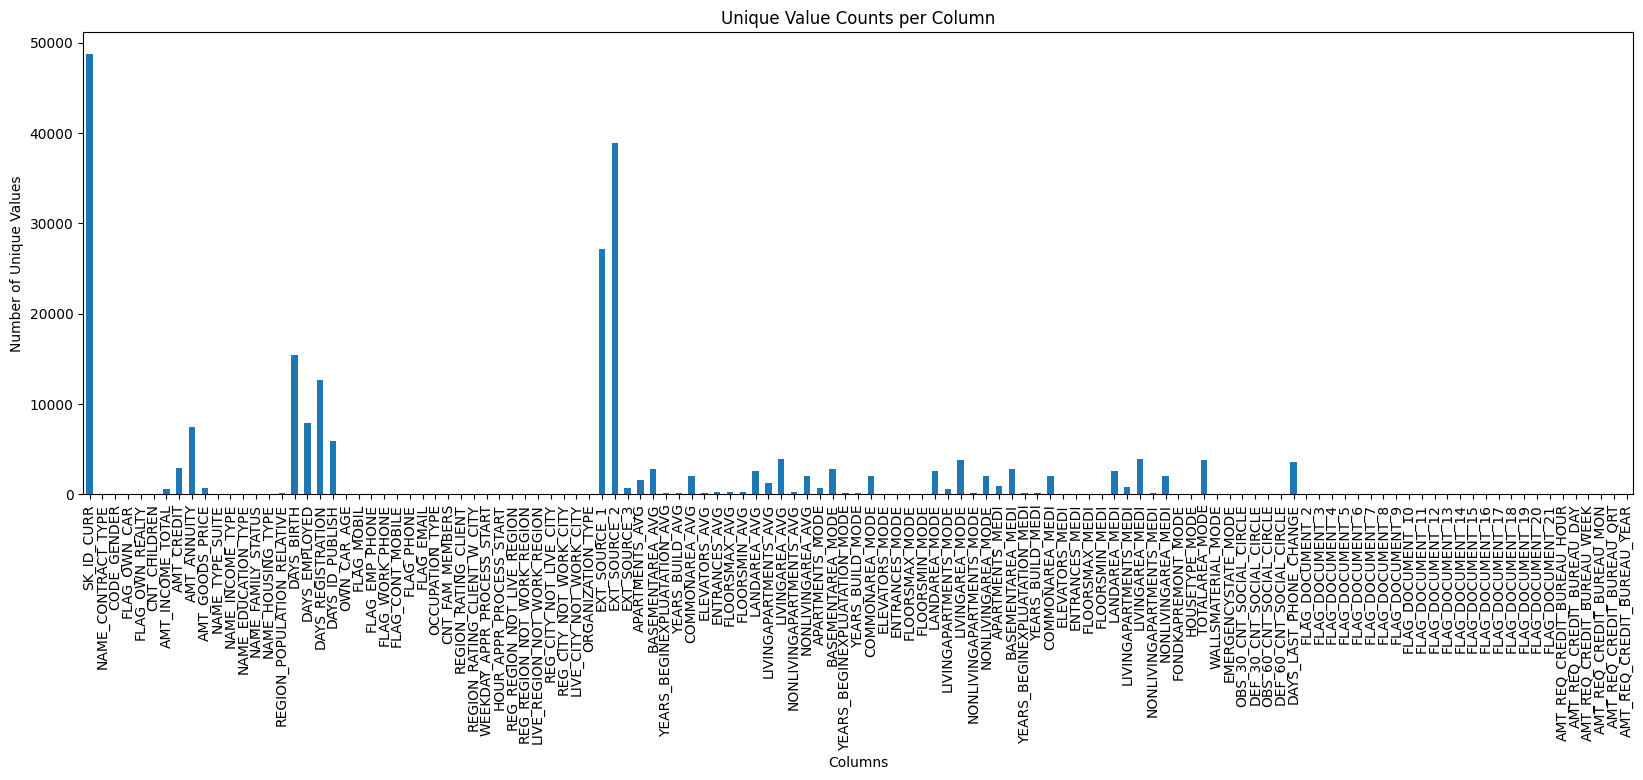

In [16]:
# Plot the number of unique values per column
unique_counts.plot(kind='bar', figsize=(20, 6))
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Unique Value Counts per Column')
plt.show()

In [17]:
# Check columns where most entries are strings of a certain length
for col in app_test.columns:
    if app_test[col].dtype == 'object':
        print(f"{col}: {app_test[col].str.len().mean()} average string length")

NAME_CONTRACT_TYPE: 10.045031183325127 average string length
CODE_GENDER: 1.0 average string length
FLAG_OWN_CAR: 1.0 average string length
FLAG_OWN_REALTY: 1.0 average string length
NAME_TYPE_SUITE: 12.119164593481488 average string length
NAME_INCOME_TYPE: 10.856290004923682 average string length
NAME_EDUCATION_TYPE: 25.089364844903987 average string length
NAME_FAMILY_STATUS: 9.519017725258493 average string length
NAME_HOUSING_TYPE: 16.809063679632366 average string length
OCCUPATION_TYPE: 10.536075319110413 average string length
WEEKDAY_APPR_PROCESS_START: 7.25480059084195 average string length
ORGANIZATION_TYPE: 12.425098473658297 average string length
FONDKAPREMONT_MODE: 16.45218536401831 average string length
HOUSETYPE_MODE: 14.020855721393035 average string length
WALLSMATERIAL_MODE: 8.040561748018188 average string length
EMERGENCYSTATE_MODE: 2.013416242698323 average string length


In [18]:
app_test[app_test.select_dtypes(include=['object']).columns]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,NaN,TUESDAY,Kindergarten,NaN,block of flats,"Stone, brick",No
1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Low-skill Laborers,FRIDAY,Self-employed,NaN,NaN,NaN,NaN
2,Cash loans,M,Y,Y,NaN,Working,Higher education,Married,House / apartment,Drivers,MONDAY,Transport: type 3,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
4,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,FRIDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,NaN,WEDNESDAY,Other,NaN,NaN,NaN,NaN
48740,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Sales staff,MONDAY,Trade: type 7,NaN,NaN,NaN,NaN
48741,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,Business Entity Type 3,NaN,block of flats,"Stone, brick",No
48742,Cash loans,M,N,N,Family,Commercial associate,Higher education,Married,House / apartment,Managers,MONDAY,Self-employed,NaN,block of flats,Panel,No


In [19]:
app_train[app_train.select_dtypes(include=['object']).columns]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [20]:
# number of unique values per column
app_test[app_test.select_dtypes(include=['object']).columns].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

We checked all the 16 columns with object dtype as they are not a lot, and they are all categorical. In order to avoid data leakage, we first fix missing values in app_train. This is because when we deploy a model, the training data is all we will have when making predictions on new data (test data). So the same statistics calculated on the training data should be applied to the test data, ensuring that both datasets are treated consistently.

In [21]:
df_unique_0 = pd.DataFrame({
    'Train Unique Values': app_train.nunique(),
    'Test Unique Values': app_test.nunique(),
    'type': app_train.dtypes,
    'percentage of train missing values': app_train.isnull().sum() / app_train.shape[0]*100,
    'percentage of test missing values': app_test.isnull().sum() / app_test.shape[0]*100
})
df_unique_sorted_0 = df_unique_0.sort_values(by='type', ascending=False)
df_unique_sorted_0

,Train Unique Values,Test Unique Values,type,percentage of train missing values,percentage of test missing values
NAME_INCOME_TYPE,8,7.0,object,0.000000,0.000000
OCCUPATION_TYPE,18,18.0,object,31.345545,32.014197
FLAG_OWN_REALTY,2,2.0,object,0.000000,0.000000
FONDKAPREMONT_MODE,4,4.0,object,68.386172,67.284179
HOUSETYPE_MODE,3,3.0,object,50.176091,48.455194
...,...,...,...,...,...
HOUR_APPR_PROCESS_START,24,24.0,int64,0.000000,0.000000
FLAG_CONT_MOBILE,2,2.0,int64,0.000000,0.000000
LIVE_CITY_NOT_WORK_CITY,2,2.0,int64,0.000000,0.000000
LIVE_REGION_NOT_WORK_REGION,2,2.0,int64,0.000000,0.000000


We first drop the columns with more than 30 percent of missing values. We chose 30% based on the above df values.

In [22]:
# Separate the TARGET column and remove it from app_train
y = app_train['TARGET']  # Save the target column
app_train_X = app_train.drop(columns=['TARGET'])  # Rename to app_train_X (features without target)

# Calculate the percentage of missing values in app_train_X
missing_percentage = app_train_X.isnull().sum() / len(app_train_X) * 100

# Identify columns with more than 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index

# Drop columns from both app_train_X and app_test
app_train_X_cleaned = app_train_X.drop(columns=columns_to_drop, axis=1)
app_test_X_cleaned = app_test.drop(columns=columns_to_drop, axis=1)

# Verify the columns have been dropped
print("app_train_X_cleaned shape after dropping columns:", app_train_X_cleaned.shape)
print("app_test_X_cleaned shape after dropping columns:", app_test_X_cleaned.shape)

# Target column
print(y.head())

app_train_X_cleaned shape after dropping columns: (307511, 71)
app_test_X_cleaned shape after dropping columns: (48744, 71)
0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64


In [23]:
df_unique = pd.DataFrame({
    'Train Unique Values': app_train_X_cleaned.nunique(),
    'Test Unique Values': app_test_X_cleaned.nunique(),
    'type': app_train_X_cleaned.dtypes,
    'percentage of train missing values': app_train_X_cleaned.isnull().sum() / len(app_train_X_cleaned) * 100,
    'percentage of test missing values': app_test_X_cleaned.isnull().sum() / len(app_test_X_cleaned) * 100
})
df_unique_sorted = df_unique.sort_values(by='type', ascending=False)
df_unique_sorted

,Train Unique Values,Test Unique Values,type,percentage of train missing values,percentage of test missing values
NAME_TYPE_SUITE,7,7,object,0.420148,1.868948
NAME_HOUSING_TYPE,6,6,object,0.000000,0.000000
CODE_GENDER,3,2,object,0.000000,0.000000
FLAG_OWN_CAR,2,2,object,0.000000,0.000000
FLAG_OWN_REALTY,2,2,object,0.000000,0.000000
...,...,...,...,...,...
LIVE_REGION_NOT_WORK_REGION,2,2,int64,0.000000,0.000000
REG_CITY_NOT_LIVE_CITY,2,2,int64,0.000000,0.000000
LIVE_CITY_NOT_WORK_CITY,2,2,int64,0.000000,0.000000
FLAG_DOCUMENT_2,2,1,int64,0.000000,0.000000


We can see that the number of columns are reduced from 121 to 71.

We handle missing values in columns with object dtype (i.e., categorical variables) by creating a "missing value" category.

In [24]:
# columns with object dtype (categorical variables)
categorical_cols_train = app_train_X_cleaned.select_dtypes(include=['object']).columns
categorical_cols_test = app_test_X_cleaned.select_dtypes(include=['object']).columns

# Fill missing values in these columns with the label "Missing"
app_train_X_cleaned[categorical_cols_train] = app_train_X_cleaned[categorical_cols_train].fillna('Missing')
app_test_X_cleaned[categorical_cols_test] = app_test_X_cleaned[categorical_cols_test].fillna('Missing')

# Check if the missing values are filled
print(app_train_X_cleaned[categorical_cols_train].isnull().sum())  # Should return 0 for all columns
print(app_test_X_cleaned[categorical_cols_test].isnull().sum())   

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64


For categorical features, ideally, the test dataset should not contain categories that are not present in the training data, as this can cause issues during model training or inference.
In reality, it’s possible to encounter new categories in the test data that were not seen during training. In such cases, we should handle these new categories appropriately (e.g., by replacing them with a default "Unknown" category).

In [25]:
categorical_cols_train = app_train_X_cleaned.select_dtypes(include=['object']).columns
categorical_cols_test = app_test_X_cleaned.select_dtypes(include=['object']).columns

# ensure all unique values in categorical columns are the same between train and test
for col in categorical_cols_train:
    if col in categorical_cols_test:
        train_unique = set(app_train_X_cleaned[col].unique())
        test_unique = set(app_test_X_cleaned[col].unique())
        
        # Check if there are any new categories in the test data
        new_categories_in_test = test_unique - train_unique
        
        if new_categories_in_test:
            print(f"New categories in test set for column {col}: {new_categories_in_test}")
            
            # Replace new categories with 'Unknown'
            app_test_X_cleaned[col] = app_test_X_cleaned[col].apply(lambda x: x if x in train_unique else 'Unknown')

for col in categorical_cols_train:
    if col in categorical_cols_test:
        print(f"Unique values in train set for column {col}: {app_train_X_cleaned[col].unique()}")
        print(f"Unique values in test set for column {col}: {app_test_X_cleaned[col].unique()}")

Unique values in train set for column NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
Unique values in test set for column NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
Unique values in train set for column CODE_GENDER: ['M' 'F' 'XNA']
Unique values in test set for column CODE_GENDER: ['F' 'M']
Unique values in train set for column FLAG_OWN_CAR: ['N' 'Y']
Unique values in test set for column FLAG_OWN_CAR: ['N' 'Y']
Unique values in train set for column FLAG_OWN_REALTY: ['Y' 'N']
Unique values in test set for column FLAG_OWN_REALTY: ['Y' 'N']
Unique values in train set for column NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Missing'
 'Other_B' 'Group of people']
Unique values in test set for column NAME_TYPE_SUITE: ['Unaccompanied' 'Missing' 'Family' 'Spouse, partner' 'Group of people'
 'Other_B' 'Children' 'Other_A']
Unique values in train set for column NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Un

In `df_unique_sorted` we can see that there are no missing values in int64 type columns. if there were any we would have handled it with mode or nearest neighbor imputation.

In [26]:
app_train_X_cleaned

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


For float64 columns we can use KNN Imputation which finds the nearest neighbors and imputes based on them, but since it is mentioned not using scikit-learn, we'll focus on simpler methods. We are gonna use median imputation which is generally more robust than mean imputation when the data contains outliers or is skewed. Since missing values are common in many real-world datasets, median is often a safe default for float64 columns.

In [27]:
# loat64 columns
float_cols_train = app_train_X_cleaned.select_dtypes(include=['float64']).columns
float_cols_test = app_test_X_cleaned.select_dtypes(include=['float64']).columns

missing_float_train = app_train_X_cleaned[float_cols_train].isnull().sum().sort_values(ascending=False)
missing_float_test = app_test_X_cleaned[float_cols_test].isnull().sum().sort_values(ascending=False)

# Impute missing values in float64 columns
for col in float_cols_train:
    if app_train_X_cleaned[col].isnull().sum() > 0:
        # Use median for imputation
        median_value = app_train_X_cleaned[col].median()
        
        # Impute in both train and test datasets by explicitly assigning back to the columns
        app_train_X_cleaned[col] = app_train_X_cleaned[col].fillna(median_value)
        app_test_X_cleaned[col] = app_test_X_cleaned[col].fillna(median_value)

print(app_train_X_cleaned[float_cols_train].isnull().sum())  # Should return 0 for all columns
print(app_test_X_cleaned[float_cols_test].isnull().sum()) 

AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
REGION_POPULATION_RELATIVE    0
DAYS_REGISTRATION             0
CNT_FAM_MEMBERS               0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
DAYS_LAST_PHONE_CHANGE        0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
REGION_POPULATION_RELATIVE    0
DAYS_REGISTRATION             0
CNT_FAM_MEMBERS               0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE   

In [28]:
# Check for missing values in app_train_X_cleaned
missing_values_train = app_train_X_cleaned.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]

# Check for missing values in app_test_X_cleaned
missing_values_test = app_test_X_cleaned.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0] 

if missing_values_train.empty:
    print("No missing values in app_train_X_cleaned")
else:
    print("Missing values in app_train_X_cleaned:")
    print(missing_values_train)

if missing_values_test.empty:
    print("No missing values in app_test_X_cleaned")
else:
    print("Missing values in app_test_X_cleaned:")
    print(missing_values_test)

No missing values in app_train_X_cleaned
No missing values in app_test_X_cleaned


## Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. **a** Fix the class imbalance with over/undersampling

 **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2ts
* 6.a: code 3pt
* 6.b: code 3pts

Class distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64


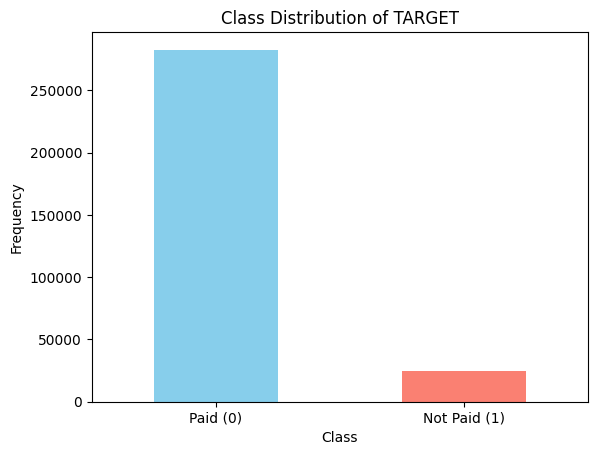

In [29]:
# 5 - value counts
# Check the class distribution
target_counts = app_train['TARGET'].value_counts()
print("Class distribution:")
print(target_counts)

# 5 - histograms
# Visualize the class distribution with a bar plot
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of TARGET')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Paid (0)', 'Not Paid (1)'], rotation=0)
plt.show()

**5**: Describe briefly your observation 

The plot clearly shows a significant class imbalance in the target variable, where the majority of instances belong to class 0 (Paid) and a small portion belongs to class 1 (Not Paid). This imbalance could lead to a model that is biased toward predicting class 0, so it might fail to classify class 1.

In [30]:
# copy your current dataframe with its .copy() method. You should always use the copy() method if you want to keep the original dataframe untouched when you modify
# this is a very common bug, so please read  https://www.statology.org/pandas-copy-dataframe/
# 6.a - fix imbalance with undersampling or oversampling
# Implement undersampling or oversampling *without* external libraries, only the library provided to implement yourself the chosen solution.
# 6. **a** Fix the class imbalance with over/undersampling


# Create a copy of the app_train DataFrame
# app_train_original = app_train.copy()
app_train_X_cleaned_copy = app_train_X_cleaned.copy()
y_copy = app_train['TARGET'].copy()

class_counts = y_copy.value_counts()
minority_class = class_counts.idxmin()  # minority class
majority_class = class_counts.idxmax()  # majority class

print("Original class distribution:")
print(class_counts)


# ### Manual Undersampling of the Majority Class ###

minority_indices = y_copy[y_copy == minority_class].index
majority_indices = y_copy[y_copy == majority_class].index

# Randomly select a subset of majority class indices to match the size of the minority class and combine with the minority indices
np.random.seed(42)  
undersampled_majority_indices = np.random.choice(majority_indices, size=len(minority_indices), replace=False)
undersampled_indices = np.concatenate([minority_indices, undersampled_majority_indices])

# Create the undersampled dataset
X_undersampled = app_train_X_cleaned_copy.loc[undersampled_indices]
y_undersampled = y_copy.loc[undersampled_indices]
print("\nClass distribution after undersampling:")
print(y_undersampled.value_counts())


# ### Manual Oversampling of the Minority Class ###

# Randomly duplicate the minority class indices until both classes are balanced and combine with the majority indices
oversampled_minority_indices = np.random.choice(minority_indices, size=len(majority_indices), replace=True)
oversampled_indices = np.concatenate([majority_indices, oversampled_minority_indices])

# Create the oversampled dataset
X_oversampled = app_train_X_cleaned_copy.loc[oversampled_indices]
y_oversampled = y_copy.loc[oversampled_indices]
print("\nClass distribution after oversampling:")
print(y_oversampled.value_counts())

Original class distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Class distribution after undersampling:
TARGET
1    24825
0    24825
Name: count, dtype: int64

Class distribution after oversampling:
TARGET
0    282686
1    282686
Name: count, dtype: int64


In `numpy.random.choice`, the replace parameter determines whether the sampling is done with replacement or without replacement.
`replace=True` allows the possibility of selecting the same element multiple times.
This is useful for oversampling because it allows to create duplicates of the minority class samples until the minority class matches the size of the majority class.
In `replace=False` each element can only be selected once.
This is used in undersampling when we want to reduce the number of samples in the majority class without duplication.

In [31]:
# contcatenate the X_oversampled and y_oversampled
df_save = pd.concat([X_oversampled, y_oversampled], axis=1)
df_save.to_csv('../data/app_train_oversampled_project1.csv', index=False)

In [ ]:
# commented for project2


# 6.b - fix balance with SMOTE on your previously copied dataframe
# You can use any external libraries to use SMOTE. We recommend the imbalanced-learn package https://imbalanced-learn.org/stable/over_sampling.html
# Make sure to select the appropriate SMOTE variant.
# Use the SMOTE algorithm to fix class imbalance


## Your code here
# app_train_smote = ...
from imblearn.over_sampling import SMOTENC

app_train_X_smote = app_train_X_cleaned.copy()
y_smote = app_train['TARGET'].copy()

# identify categorical features based on dtype
categorical_columns = app_train_X_smote.select_dtypes(include=['object']).columns
categorical_indices = [app_train_X_smote.columns.get_loc(col) for col in categorical_columns]

print("Categorical columns identified:", categorical_columns)

# Initialize SMOTENC with categorical feature indices
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)

# Fit and resample the data
X_smote, y_smote = smote_nc.fit_resample(app_train_X_smote, y_smote)

print("Class distribution after SMOTENC:")
print(pd.Series(y_smote).value_counts())

In [33]:
# We will use the dataframe app_train from 6.a in the following
# so we will use [X_oversampled, y_oversampled] from 6.a for the following questions

<h2>Categorical features (9pts)</h2>

In `app_test`

**7a**: How will you transform the column NAME_HOUSING_TYPE in app_test be correctly handled by the model? How will you transform CODE_GENDER column?

**7b**: How would you transform the column NAME_HOUSING_TYPE in app_test if you want only 3 categories? Use LabelEncoder to transform FLAG_OWN_CAR column.

**7c**: In ORGANIZATION_TYPE, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for ORGANIZATION_TYPE after this transformation?


8: **In app_test, app_past and bureau,** transform all the categorical columns that you have not processed in 7 using One-hot encoding.

*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts.

In [34]:
X_oversampled['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      493687
With parents            32853
Municipal apartment     21223
Rented apartment        11199
Office apartment         4458
Co-op apartment          1952
Name: count, dtype: int64

In [35]:
# Reduce NAME_HOUSING_TYPE to 3 categories

def reduce_name_housing_type(df):
    # Group categories
    df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].replace({
        'House / apartment': 'House / apartment',    # Keep
        'With parents': 'With parents',              # Keep
        # All others grouped into 'Other'
        'Municipal apartment': 'Other',
        'Rented apartment': 'Other',
        'Office apartment': 'Other',
        'Co-op apartment': 'Other'
    })
    return df

app_train_transformed = reduce_name_housing_type(X_oversampled)
app_test_X_cleaned = reduce_name_housing_type(app_test_X_cleaned)

# apply One-Hot Encoding to the reduced categories in NAME_HOUSING_TYPE
app_train_transformed = pd.get_dummies(app_train_transformed, columns=['NAME_HOUSING_TYPE'], drop_first=True)
app_test_transformed = pd.get_dummies(app_test_X_cleaned, columns=['NAME_HOUSING_TYPE'], drop_first=True)

missing_cols = set(app_train_transformed.columns) - set(app_test_transformed.columns)
for col in missing_cols:
    app_test_transformed[col] = 0
# Ensure the test set columns are in the same order as the training set
app_test_transformed = app_test_transformed[app_train_transformed.columns]

In [36]:
app_train_X_cleaned['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [37]:
# Label Encoding for CODE_GENDER
# Fit the transformation on the training set (CODE_GENDER)
app_train_transformed['CODE_GENDER'] = app_train_transformed['CODE_GENDER'].map({'F': 0, 'M': 1, 'XNA': 2})
# Apply the same transformation to the test set (CODE_GENDER)
# Ensure consistency in encoding between training and test sets
app_test_transformed['CODE_GENDER'] = app_test_X_cleaned['CODE_GENDER'].map({'F': 0, 'M': 1, 'XNA': 2})


print("Transformed app_train_X_cleaned_copy['CODE_GENDER']:")
print(app_train_transformed['CODE_GENDER'].value_counts())
print("Transformed app_test_transformed['CODE_GENDER']:")
print(app_test_transformed['CODE_GENDER'].value_counts())


Transformed app_train_X_cleaned_copy['CODE_GENDER']:
CODE_GENDER
0    349817
1    215551
2         4
Name: count, dtype: int64
Transformed app_test_transformed['CODE_GENDER']:
CODE_GENDER
0    32678
1    16066
Name: count, dtype: int64


first we apply One-Hot Encoding to the NAME_HOUSING_TYPE column in both the training and test datasets, ensuring the test set has the same columns as the training set by adding any missing columns with a default value of 0 and reordering them to match the training set. For the CODE_GENDER column, Label Encoding is used to convert the categories (F, M, and XNA) into numerical values (0, 1, 2), ensuring consistency in encoding between the training and test sets. This ensures both columns are properly transformed for model training and evaluation.

In [38]:
app_train_transformed['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    382626
Y    182746
Name: count, dtype: int64

In [39]:
# transform FLAG_OWN_CAR
# 'Y' becomes 1 and 'N' becomes 0
app_train_transformed['FLAG_OWN_CAR'] = app_train_transformed['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
app_test_transformed['FLAG_OWN_CAR'] = app_test_X_cleaned['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

In [40]:
# Check the transformed columns
# print columns with name containing 'NAME_HOUSING_TYPE'
app_train_transformed.filter(like='NAME_HOUSING_TYPE').value_counts()

NAME_HOUSING_TYPE_Other  NAME_HOUSING_TYPE_With parents
False                    False                             493687
True                     False                              38832
False                    True                               32853
Name: count, dtype: int64

We first reduced the NAME_HOUSING_TYPE column to 3 categories by grouping less frequent categories ('Municipal apartment', 'Rented apartment', 'Office apartment', and 'Co-op apartment') into a single 'Other' category, while keeping 'House / apartment' and 'With parents'. One-Hot Encoding is then applied to both the training and test sets, ensuring that the test set has the same columns as the training set by adding any missing columns with a default value of 0. Additionally, the FLAG_OWN_CAR column is transformed manually by mapping 'Y' to 1 and 'N' to 0 for both datasets, converting this binary categorical variable into numerical form for the model.

In [41]:
# ORGANIZATION_TYPE in the training set
organization_counts = app_train_transformed['ORGANIZATION_TYPE'].value_counts(normalize=True)
print(organization_counts)

ORGANIZATION_TYPE
Business Entity Type 3    0.237208
XNA                       0.152385
Self-employed             0.140695
Other                     0.053094
Business Entity Type 2    0.035281
Medicine                  0.033045
Government                0.031638
Trade: type 7             0.027504
Construction              0.025879
School                    0.025274
Kindergarten              0.020799
Business Entity Type 1    0.019599
Transport: type 4         0.018763
Trade: type 3             0.012861
Industry: type 3          0.012272
Security                  0.011757
Industry: type 9          0.010123
Housing                   0.009371
Industry: type 11         0.009143
Agriculture               0.008897
Postal                    0.007264
Military                  0.007089
Transport: type 2         0.007047
Restaurant                0.007040
Bank                      0.006880
Police                    0.006222
Trade: type 2             0.005727
Transport: type 3         0.005497
Se

In [42]:
# categories that appear in more than 10% of the dataset
categories_to_keep = organization_counts[organization_counts > 0.10].index
print(f"Categories to keep: {categories_to_keep}")

Categories to keep: Index(['Business Entity Type 3', 'XNA', 'Self-employed'], dtype='object', name='ORGANIZATION_TYPE')


In [43]:
# Define a function to group less frequent categories into 'Other'
def transform_organization_type(df, categories_to_keep):
    df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: x if x in categories_to_keep else 'Other')
    return df

# Apply the transformation to the training set
app_train_transformed = transform_organization_type(app_train_transformed, categories_to_keep)
# Apply the transformation to the test set
app_test_X_cleaned = transform_organization_type(app_test_X_cleaned, categories_to_keep)

# Apply One-Hot Encoding to ORGANIZATION_TYPE in both training and test sets
app_train_transformed = pd.get_dummies(app_train_transformed, columns=['ORGANIZATION_TYPE'], drop_first=True)
app_test_transformed = pd.get_dummies(app_test_X_cleaned, columns=['ORGANIZATION_TYPE'], drop_first=True)

missing_cols = set(app_train_transformed.columns) - set(app_test_transformed.columns)
for col in missing_cols:
    app_test_transformed[col] = 0
app_test_transformed = app_test_transformed[app_train_transformed.columns]

dummy_vector_size = app_train_transformed.filter(like='ORGANIZATION_TYPE').shape[1]
print(f"Size of the dummy vector for ORGANIZATION_TYPE: {dummy_vector_size}")

Size of the dummy vector for ORGANIZATION_TYPE: 3


We first analyze the ORGANIZATION_TYPE column in the training set to determine which categories appear in more than 10% of the dataset. 
The categories that meet this threshold are retained, while the less frequent ones are grouped into a single 'Other' category. 
This transformation is applied to both the training and test sets to ensure consistency. 
Next, One-Hot Encoding is performed on the transformed ORGANIZATION_TYPE column in both datasets. 
To ensure the test set has the same structure as the training set, any missing columns in the test set are added with a default value of 0, and the columns are reordered to match the training set. 
Finally, the size of the dummy vector, representing the number of binary columns created from ORGANIZATION_TYPE, is calculated.

In [44]:
# 8: **In app_test, app_past and bureau,** transform all the categorical columns that 
# you have not processed in 7 using One-hot encoding.

In [45]:
# Function to One-Hot Encode remaining categorical columns
def one_hot_encode_remaining(df, exclude_cols=[]):
    # Identify categorical columns excluding already processed ones
    categorical_cols = df.select_dtypes(include=['object']).columns.difference(exclude_cols)
    print(f"Categorical columns to encode: {list(categorical_cols)}")
    
    # Apply One-Hot Encoding to the remaining categorical columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return df

# List of columns processed in step 7 for app_train
processed_columns_train = ['NAME_HOUSING_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'ORGANIZATION_TYPE']

app_train_transformed = one_hot_encode_remaining(app_train_transformed, exclude_cols=processed_columns_train)

processed_columns_test = processed_columns_train  # Same columns for test set
app_test_transformed = one_hot_encode_remaining(app_test_X_cleaned, exclude_cols=processed_columns_test)

app_past_transformed = one_hot_encode_remaining(app_past)

bureau_transformed = one_hot_encode_remaining(bureau)


missing_cols_test = set(app_train_transformed.columns) - set(app_test_transformed.columns)
for col in missing_cols_test:
    app_test_transformed[col] = 0

app_test_transformed = app_test_transformed[app_train_transformed.columns]

Categorical columns to encode: ['FLAG_OWN_REALTY', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START']
Categorical columns to encode: ['FLAG_OWN_REALTY', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START']
Categorical columns to encode: ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
Categorical columns to encode: ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']


In [46]:
app_train_transformed[app_train_transformed.select_dtypes(include=['object']).columns]

""
1
2
3
4
5
...
32008
241420
134531
93467


In [47]:
# Function to One-Hot Encode only remaining the object columns, using training set as reference
def one_hot_encode_object_columns(df, reference_df=None):
    # Identify categorical columns (object dtype)
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Apply One-Hot Encoding to the identified categorical columns
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    # If reference_df is provided, align the columns with the reference dataframe (train set)
    if reference_df is not None:
        missing_cols = set(reference_df.columns) - set(df_encoded.columns)
        for col in missing_cols:
            df_encoded[col] = 0
        df_encoded = df_encoded[reference_df.columns]
    
    return df_encoded

# Apply One-Hot Encoding to the training set
app_train_transformed = one_hot_encode_object_columns(app_train_transformed)

# Apply One-Hot Encoding to the test set using the training set as reference
app_test_transformed = one_hot_encode_object_columns(app_test_X_cleaned, reference_df=app_train_transformed)

# Apply One-Hot Encoding to app_past using the training set as reference
app_past_transformed = one_hot_encode_object_columns(app_past, reference_df=app_train_transformed)

# Apply One-Hot Encoding to bureau using the training set as reference
bureau_transformed = one_hot_encode_object_columns(bureau, reference_df=app_train_transformed)


print(f"Training set shape after encoding: {app_train_transformed.shape}")
print(f"Test set shape after encoding: {app_test_transformed.shape}")
print(f"App_past set shape after encoding: {app_past_transformed.shape}")
print(f"Bureau set shape after encoding: {bureau_transformed.shape}")

/var/folders/l0/k7f2rhdj5xg3__zf2_xlw76c0000gn/T/ipykernel_14676/175644304.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[col] = 0


Training set shape after encoding: (565372, 98)
Test set shape after encoding: (48744, 98)
App_past set shape after encoding: (1670214, 98)
Bureau set shape after encoding: (1716428, 98)


<h2>Anomalies (7 pts)</h2>

**In app_test**

**9a**: Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?

**9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

**9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

10: Fix the anomaly in DAYS_EMPLOYED?

*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

In [48]:
app_train_transformed['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    565372.000000
mean          0.164474
std           0.478559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

The maximum value of 34 is an extreme outlier, while most individuals have 0 defaults. This value likely represents an anomaly or rare case that could distort the data.

In [49]:
# Calculate the 99th percentile for DEF_30_CNT_SOCIAL_CIRCLE in the training set
def_30_threshold = app_train_transformed['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.99)

# Cap the values in the training set at the 99th percentile
app_train_transformed['DEF_30_CNT_SOCIAL_CIRCLE'] = app_train_transformed['DEF_30_CNT_SOCIAL_CIRCLE'].apply(
    lambda x: def_30_threshold if x > def_30_threshold else x
)

# Verify the changes by checking the description again
app_train_transformed['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    565372.000000
mean          0.156508
std           0.431132
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [50]:
# Apply the same capping process to app_test_transformed based on the 99th percentile from app_train_transformed
app_test_transformed['DEF_30_CNT_SOCIAL_CIRCLE'] = app_test_transformed['DEF_30_CNT_SOCIAL_CIRCLE'].apply(
    lambda x: def_30_threshold if x > def_30_threshold else x
)

# Verify the changes in app_test_transformed by checking the description
app_test_transformed['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    48744.000000
mean         0.135340
std          0.401517
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In this approach, we identified outliers in the DEF_30_CNT_SOCIAL_CIRCLE column in both the training and test datasets. Most values in this column were 0, indicating no defaults in an individual's social circle, but a small number of extreme outliers skewed the data, with a maximum value of 34.

To handle this, we capped the values at the 99th percentile of the training set. This method reduces the influence of extreme outliers while retaining the general distribution of the data. We first applied this transformation to the training data (app_train_transformed), which reduced the maximum value to 2 and lowered the mean and standard deviation slightly.

Afterward, we applied the same capping process to the test set (app_test_transformed) using the threshold derived from the training set, ensuring consistency between the datasets.

This process ensures that outliers do not distort the analysis or model performance while maintaining consistency between the training and test sets.

In [51]:
app_train["LANDAREA_AVG"].isnull().sum()/len(app_train["LANDAREA_AVG"])

0.5937673774271489

We have removed this column because it contains a lot of missing values.

In [52]:
app_train_transformed["AMT_INCOME_TOTAL"].describe()

count    5.653720e+05
mean     1.675858e+05
std      5.474468e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Extremely high maximum value: 117 million is an outlier, far above the 75th percentile.

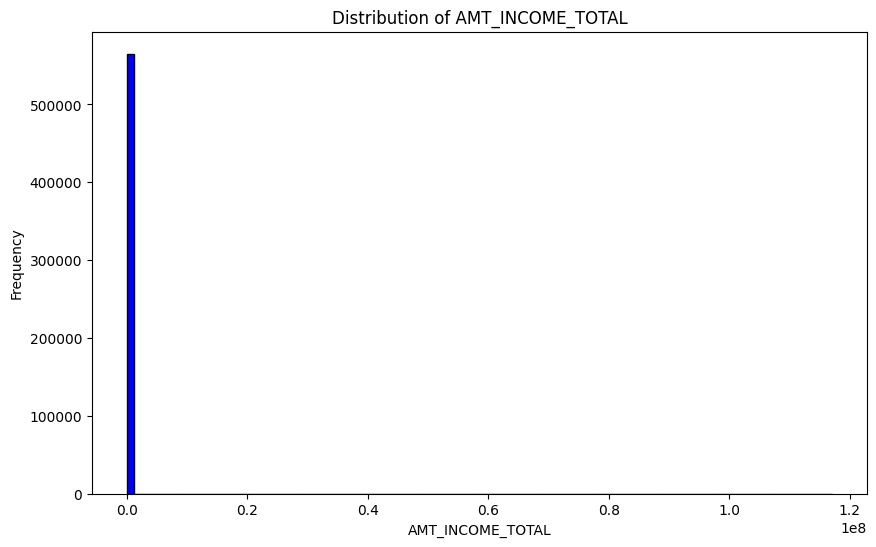

In [53]:
# Plot a histogram of AMT_INCOME_TOTAL before capping
plt.figure(figsize=(10, 6))
plt.hist(app_train_transformed['AMT_INCOME_TOTAL'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

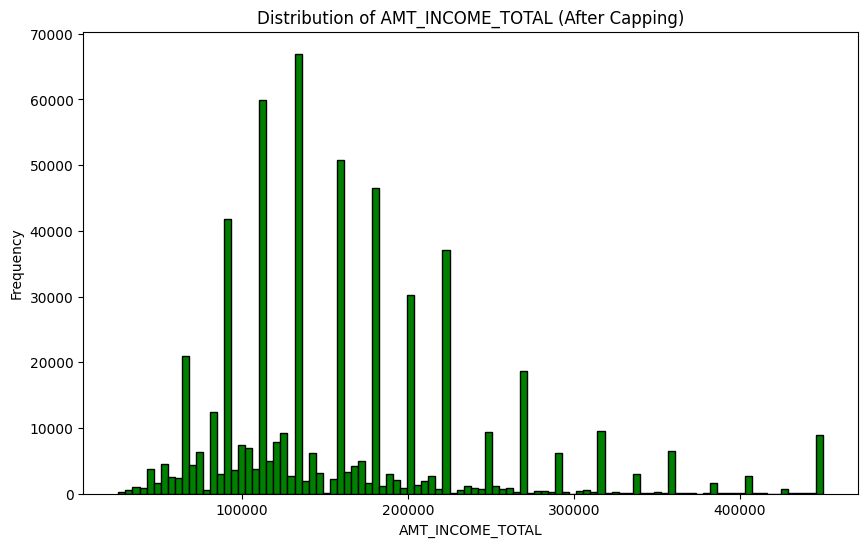

In [54]:
# Calculate the 99th percentile in the training set
income_99th_percentile = app_train_transformed['AMT_INCOME_TOTAL'].quantile(0.99)

# Cap the values in the training set at the 99th percentile
app_train_transformed['AMT_INCOME_TOTAL'] = app_train_transformed['AMT_INCOME_TOTAL'].apply(
    lambda x: income_99th_percentile if x > income_99th_percentile else x
)

# Plot a histogram after capping to see the effect
plt.figure(figsize=(10, 6))
plt.hist(app_train_transformed['AMT_INCOME_TOTAL'], bins=100, color='green', edgecolor='black')
plt.title('Distribution of AMT_INCOME_TOTAL (After Capping)')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

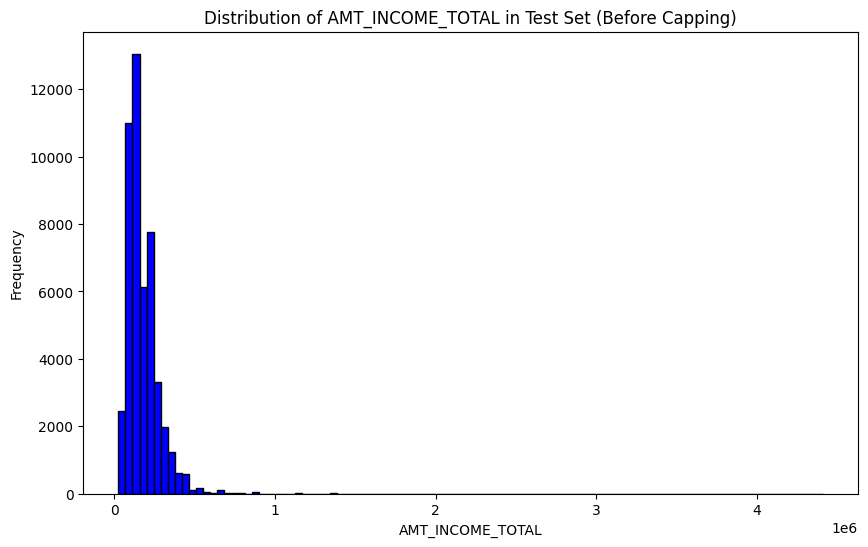

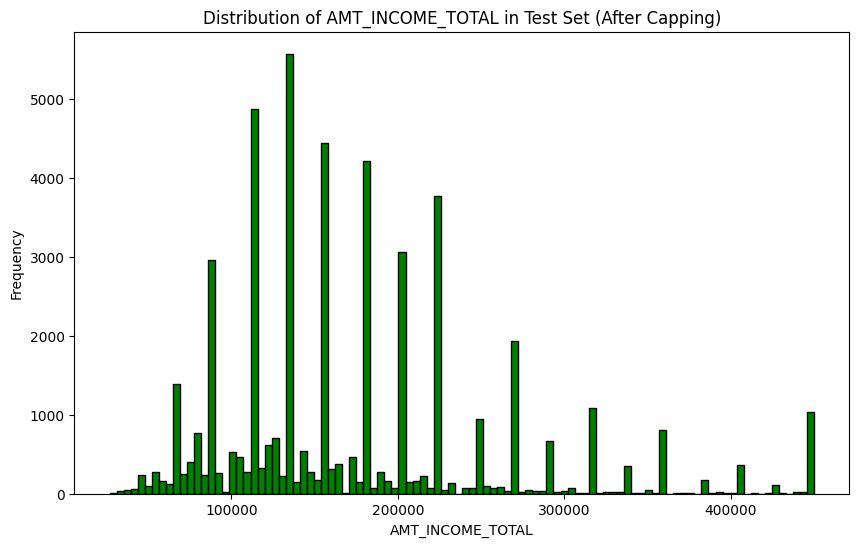

In [55]:
# Plot a histogram of AMT_INCOME_TOTAL in the test set before capping
plt.figure(figsize=(10, 6))
plt.hist(app_test_transformed['AMT_INCOME_TOTAL'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of AMT_INCOME_TOTAL in Test Set (Before Capping)')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

# Apply the same capping process to the test set based on the 99th percentile from the training set
app_test_transformed['AMT_INCOME_TOTAL'] = app_test_transformed['AMT_INCOME_TOTAL'].apply(
    lambda x: income_99th_percentile if x > income_99th_percentile else x
)

# Plot a histogram of AMT_INCOME_TOTAL in the test set after capping
plt.figure(figsize=(10, 6))
plt.hist(app_test_transformed['AMT_INCOME_TOTAL'], bins=100, color='green', edgecolor='black')
plt.title('Distribution of AMT_INCOME_TOTAL in Test Set (After Capping)')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()


In [56]:
app_train_transformed['DAYS_EMPLOYED'].describe() 

count    565372.000000
mean      53865.171747
std      132040.601268
min      -17912.000000
25%       -2476.000000
50%       -1123.000000
75%        -338.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

The maximum value 365,243 days (~1,000 years) is clearly an anomaly and likely represents missing or unknown employment data.
We can replace the value 365,243 with the median or mean of the column.

In [57]:
median_days_employed = app_train_transformed[app_train_transformed['DAYS_EMPLOYED'] != 365243]['DAYS_EMPLOYED'].median()
app_train_transformed['DAYS_EMPLOYED'] = app_train_transformed['DAYS_EMPLOYED'].replace(365243, median_days_employed)
app_train_transformed['DAYS_EMPLOYED'].describe()

count    565372.000000
mean      -2010.155722
std        1983.693876
min      -17912.000000
25%       -2476.000000
50%       -1430.000000
75%        -794.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [58]:
app_test_transformed['DAYS_EMPLOYED'] = app_test_transformed['DAYS_EMPLOYED'].replace(365243, median_days_employed)
app_test_transformed['DAYS_EMPLOYED'].describe()

count    48744.000000
mean     -2277.587108
std       2117.079314
min     -17463.000000
25%      -2910.000000
50%      -1430.000000
75%      -1048.000000
max         -1.000000
Name: DAYS_EMPLOYED, dtype: float64

In [59]:
# Save the transformed datasets to CSV files
concatenated = pd.concat([app_train_transformed, y_oversampled], axis=1)
concatenated.to_csv('../data/app_train_transformed_project1.csv', index=False)

<h2>Correlations (9 pts)</h2>


11: **In app_test**, remove the collinear features of the dataset. How did you choose the threshold?

12: What features from bureau.csv could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

In [60]:
app_train_transformed.dtypes.value_counts()

int64      42
bool       36
float64    20
Name: count, dtype: int64

In [62]:
# Correlation matrix for the training set
corr_matrix = app_train_transformed.corr().abs()

threshold = 0.8

# Identify pairs of features that are above the threshold
# Select the upper triangle of the correlation matrix (to avoid duplicate pairs)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Features that have a correlation above the threshold
collinear_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Remove collinear features from the training set
app_train_reduced = app_train_transformed.drop(columns=collinear_features)

print(f"Collinear features removed: {collinear_features}")
print(f"Remaining features after removing collinear features: {app_train_reduced.shape[1]}")

Collinear features removed: ['AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'ORGANIZATION_TYPE_XNA', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_INCOME_TYPE_Pensioner']
Remaining features after removing collinear features: 88


In [63]:
# Remove the collinear features from the test set
app_test_reduced = app_test_transformed.drop(columns=collinear_features)

print(f"Test set shape after removing collinear features: {app_test_reduced.shape[1]}")

Test set shape after removing collinear features: 88


Threshold of 0.8 is a good starting point. It balances between removing collinear features and retaining as much information as possible and it is not that strict. Then by trial and error and different models we can find a suitable threshold.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Prepare the data: X is app_train_reduced, y is the target from before
X_train = app_train_reduced  # Features are in app_train_reduced
y_train = y  # Target is the 'TARGET' column stored in 'y'

# 2. Train the Random Forest model on the training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Predict on the test set (app_test_reduced)
test_predictions = rf_model.predict(app_test_reduced)

# Output the predictions for the test set
print("Test Set Predictions:")
print(test_predictions)

Test Set Predictions:
[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Prepare the data: X is app_train_reduced, y is the target from before
X_train = app_train_reduced  # Features are in app_train_reduced
y_train = y  # Target is the 'TARGET' column stored in 'y'

# 2. Split the training set into a training and validation set (for evaluation purposes)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 3. Train the Random Forest model on the training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# 4. Predict on the validation set
y_val_pred = rf_model.predict(X_val_split)

# 5. Calculate accuracy
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# 6. Print classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_val_split, y_val_pred))

Validation Accuracy: 0.9195
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.56      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.74      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503



In [ ]:
# calculate the correlation matrix for bureau_transformed
corr_matrix = bureau_transformed.corr().abs()

# set a correlation threshold
threshold = 0.9

# identify the upper triangle of the correlation matrix to avoid duplicate pairs
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find features with correlation greater than the threshold
collinear_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# remove collinear features from bureau_transformed
bureau_reduced = bureau_transformed.drop(columns=collinear_features)

# Output the removed features and the shape of the reduced dataset
print(f"Collinear features removed: {collinear_features}")
print(f"Remaining features after removing collinear features: {bureau_reduced.shape[1]}")

Collinear features removed: []
Remaining features after removing collinear features: 98


In [ ]:
# Merge the reduced bureau data with the reduced training set
app_train_merged = pd.concat([app_train_reduced, bureau_reduced], axis=1)
app_train_merged.dropna(inplace=True)

In [ ]:
app_train_merged.shape

# X_train = app_train_merged  # Features are in the merged dataset
# y_train = y  # Target is still the 'TARGET' column from earlier

# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# rf_model_merged = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model_merged.fit(X_train_split, y_train_split)

# y_val_pred = rf_model_merged.predict(X_val_split)

# accuracy_merged = accuracy_score(y_val_split, y_val_pred)
# classification_report_merged = classification_report(y_val_split, y_val_pred)

# # Output the results
# print(f"Validation Accuracy (Merged Data): {accuracy_merged:.4f}")
# print("Classification Report (Merged Data):")
# print(classification_report_merged)

(95033, 186)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Correlation matrix and feature reduction for app_train_transformed
corr_matrix = app_train_transformed.corr().abs()
threshold = 0.8
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
collinear_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
app_train_reduced = app_train_transformed.drop(columns=collinear_features)

# Split train data into training and validation sets
X_train = app_train_reduced
y_train = y
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# Predict and evaluate on validation set
y_val_pred = rf_model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_val_pred)
classification_report_output = classification_report(y_val_split, y_val_pred)

# Correlation matrix and feature reduction for bureau_transformed
corr_matrix = bureau_transformed.corr().abs()
threshold = 0.9
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
collinear_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
bureau_reduced = bureau_transformed.drop(columns=collinear_features)

# Merge datasets
app_train_merged = pd.concat([app_train_reduced, bureau_reduced], axis=1)
app_train_merged.dropna(inplace=True)

# Train Random Forest on merged data
X_train = app_train_merged
y_train = y
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

rf_model_merged = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_merged.fit(X_train_split, y_train_split)

y_val_pred_merged = rf_model_merged.predict(X_val_split)
accuracy_merged = accuracy_score(y_val_split, y_val_pred_merged)
classification_report_merged = classification_report(y_val_split, y_val_pred_merged)

print(f"Validation Accuracy (Reduced Data): {accuracy:.4f}")
print("Classification Report (Reduced Data):")
print(classification_report_output)

print(f"Validation Accuracy (Merged Data): {accuracy_merged:.4f}")
print("Classification Report (Merged Data):")
print(classification_report_merged)


##  Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in *6.b*. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


In [ ]:
## Your code here

**13**: Answer the question here (double click to edit a text cell)

